<a href="https://colab.research.google.com/github/antonychackotc/project-1/blob/main/Basic_EDA_retail_order_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import seaborn as sns
import pandas as pd

In [4]:
df=pd.read_csv('/content/cleaned-orders-1.csv')
df.head(1)

,Unnamed: 0,Order_Id,Order_Date,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,...,List_Price,Quantity,Discount_Percent,Selling_Price,Discount,Profit,year,month,day,Month_name
0,0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,...,260,2,2,254.8,5.2,14.8,2023,3,1,March


# **Exploratory Data Analysis (EDA Process)**

Generating questions about the data

Visualizing, transforming, and modeling the data

Using the results to refine questions and generate new ones

Using data visualization methods, such as scatterplots and correlation coefficients

Mapping data to understand spatial relationships

In [5]:
pip install seaborn

In [6]:
import seaborn as sns

In [7]:
df=pd.read_csv('/content/cleaned-orders-1.csv')
df.head()

,Unnamed: 0,Order_Id,Order_Date,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,...,List_Price,Quantity,Discount_Percent,Selling_Price,Discount,Profit,year,month,day,Month_name
0,0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,...,260,2,2,254.8,5.2,14.8,2023,3,1,March
1,1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,...,730,3,3,708.1,21.9,108.1,2023,8,15,August
2,2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,...,10,2,5,9.5,0.5,-0.5,2023,1,10,January
3,3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,...,960,5,2,940.8,19.2,160.8,2022,6,18,June
4,4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,...,20,2,5,19.0,1.0,-1.0,2022,7,13,July


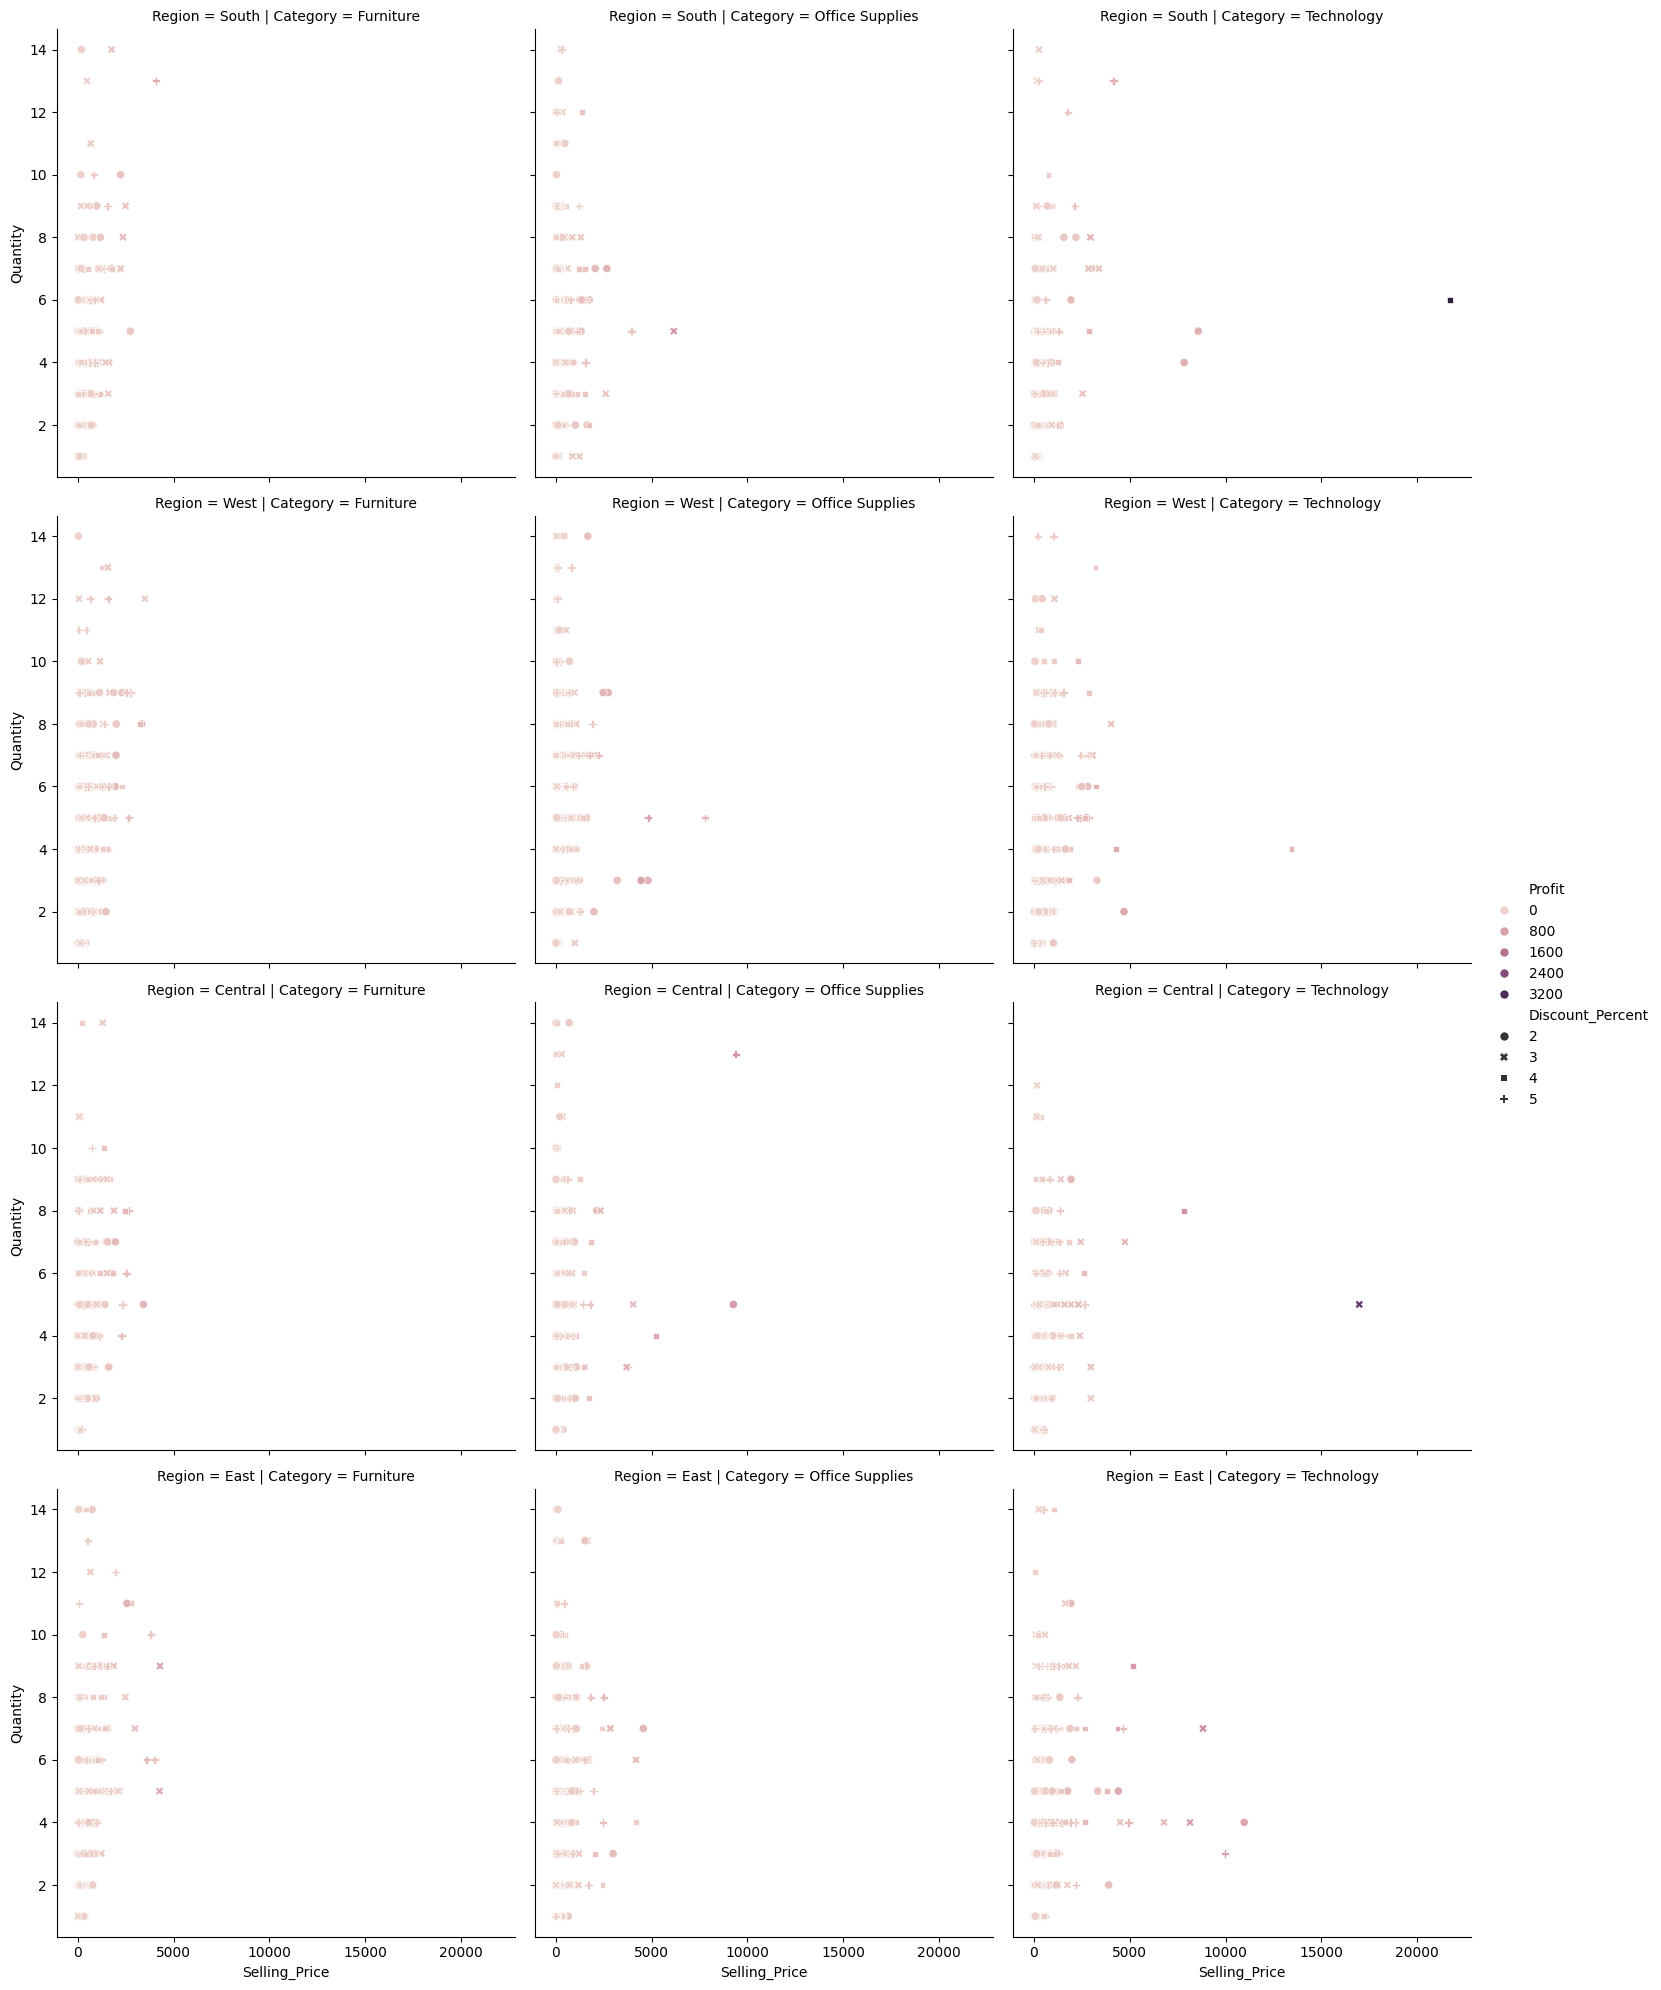

In [8]:
sns.relplot(x='Selling_Price',y='Quantity',hue='Profit',style='Discount_Percent',row='Region',col='Category',data=df)

# **1)Region**

<Axes: xlabel='Region', ylabel='Selling_Price'>

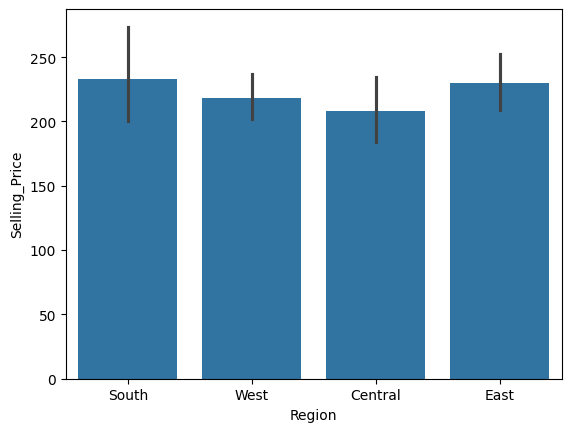

In [9]:
sns.barplot(data=df,x='Region',y='Selling_Price')

<Axes: xlabel='Region', ylabel='Profit'>

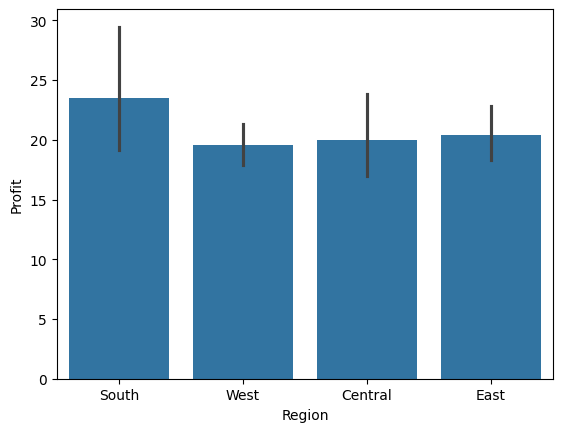

In [10]:
sns.barplot(data=df,x='Region',y='Profit')

<Axes: xlabel='Region', ylabel='Quantity'>

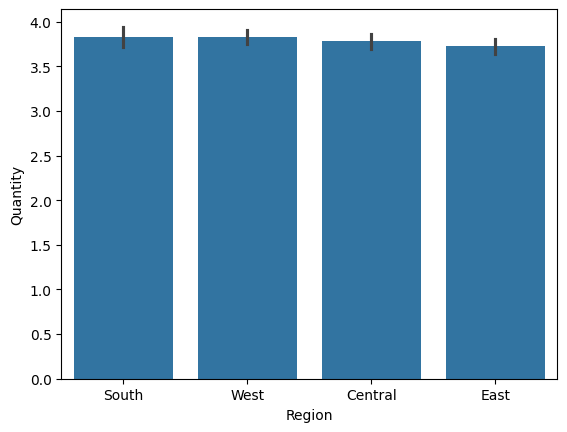

In [11]:
sns.barplot(data=df,x='Region',y='Quantity')

<Axes: xlabel='Region', ylabel='Discount'>

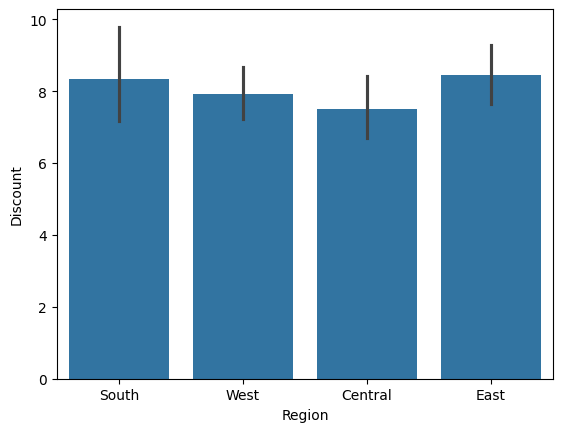

In [12]:
sns.barplot(data=df,x='Region',y='Discount')

analysing a 4 region discount equally given by south and East, high quantity sold by south and other 3 regions almost near to south region

high selling price generate by south and east almost equally - especially south was 1st - but high profit generated by south region - anlysing a **barport**

In [13]:
import sqlite3
import pandas as pd

# File name of the uploaded CSV
csv_filename = "/content/cleaned-orders-1.csv"  # Replace this with the uploaded file name

# Load CSV into a pandas DataFrame
df = pd.read_csv(csv_filename)

# Connect to SQLite database (or create a new one)
conn = sqlite3.connect("example.db")
cursor = conn.cursor()

# Write DataFrame to SQLite table
table_name = "cleanedorders1"  # Specify your table name
df.to_sql(table_name, conn, if_exists="replace", index=False)

print(f"Table '{table_name}' created in SQLite database.")

query = f"select City from {table_name} where Region='South';"
result = pd.read_sql_query(query, conn)

# Display the results
result

Table 'cleanedorders1' created in SQLite database.


,City
0,Henderson
1,Henderson
2,Fort Lauderdale
3,Fort Lauderdale
4,Concord
...,...
1615,Smyrna
1616,Lafayette
1617,Athens
1618,Athens


# **2) Discount**

In [14]:
import matplotlib.pyplot as plt

<Axes: xlabel='Month_name', ylabel='Discount'>

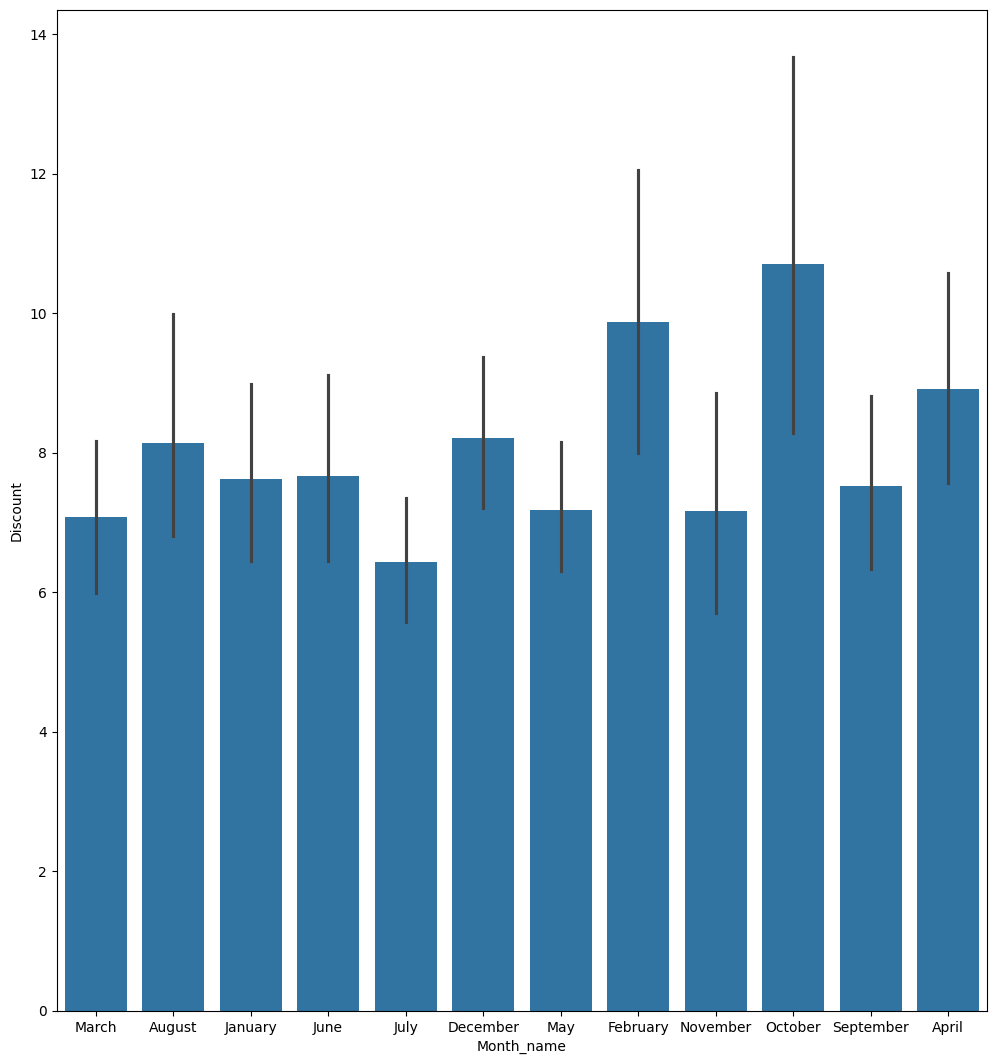

In [15]:
fig, ax = plt.subplots(figsize=(12, 13))

sns.barplot(data=df,x='Month_name',y='Discount',ax=ax)


In [16]:
query = f"select distinct Region,sum(Discount) as disc,year from {table_name} where Month_name='October' group by Region order by Disc DESC ;"
result = pd.read_sql_query(query, conn)

# Display the results
result

,Region,disc,year
0,West,2827.9,2022
1,Central,2245.0,2022
2,East,2229.5,2023
3,South,1913.4,2022


# **3)Selling Price**

<Axes: xlabel='Month_name', ylabel='Selling_Price'>

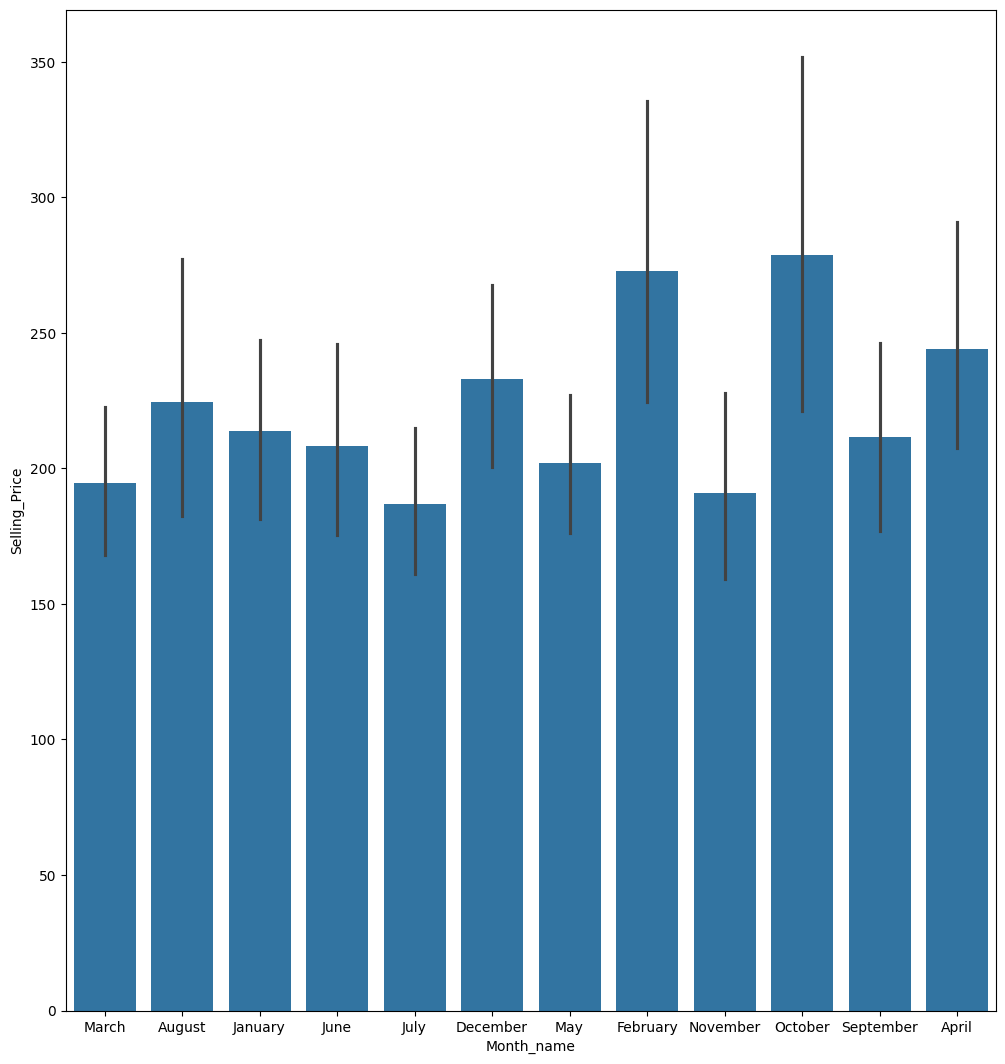

In [17]:
fig, ax = plt.subplots(figsize=(12, 13))

sns.barplot(data=df,x='Month_name',y='Selling_Price',ax=ax)


In [18]:
query = f"select distinct Region,sum(Selling_Price) as sales,year from {table_name} where Month_name='October' group by Region order by sales DESC ;"
result = pd.read_sql_query(query, conn)

# Display the results
result

,Region,sales,year
0,West,74172.1,2022
1,East,58210.5,2023
2,Central,57135.0,2022
3,South,50456.6,2022


<Axes: xlabel='Month_name', ylabel='Profit'>

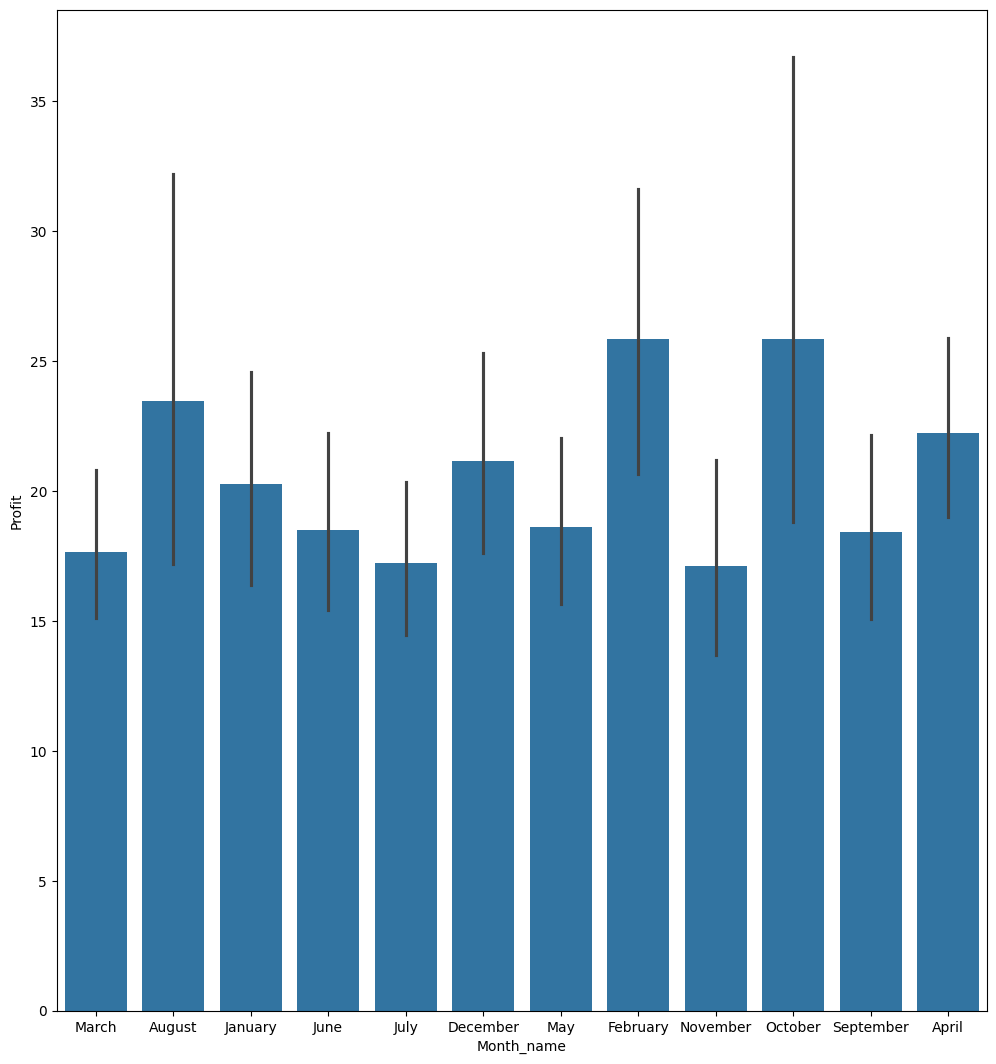

In [19]:
fig, ax = plt.subplots(figsize=(12, 13))

sns.barplot(data=df,x='Month_name',y='Profit',ax=ax)


In [20]:
query = f"select distinct Region,sum(Profit) as profit,year from {table_name} where Month_name='October' group by Region order by profit DESC;"
result = pd.read_sql_query(query, conn)

# Display the results
result

,Region,profit,year
0,South,6096.6,2022
1,Central,6075.0,2022
2,West,5662.1,2022
3,East,4420.5,2023


<Axes: xlabel='Month_name', ylabel='Quantity'>

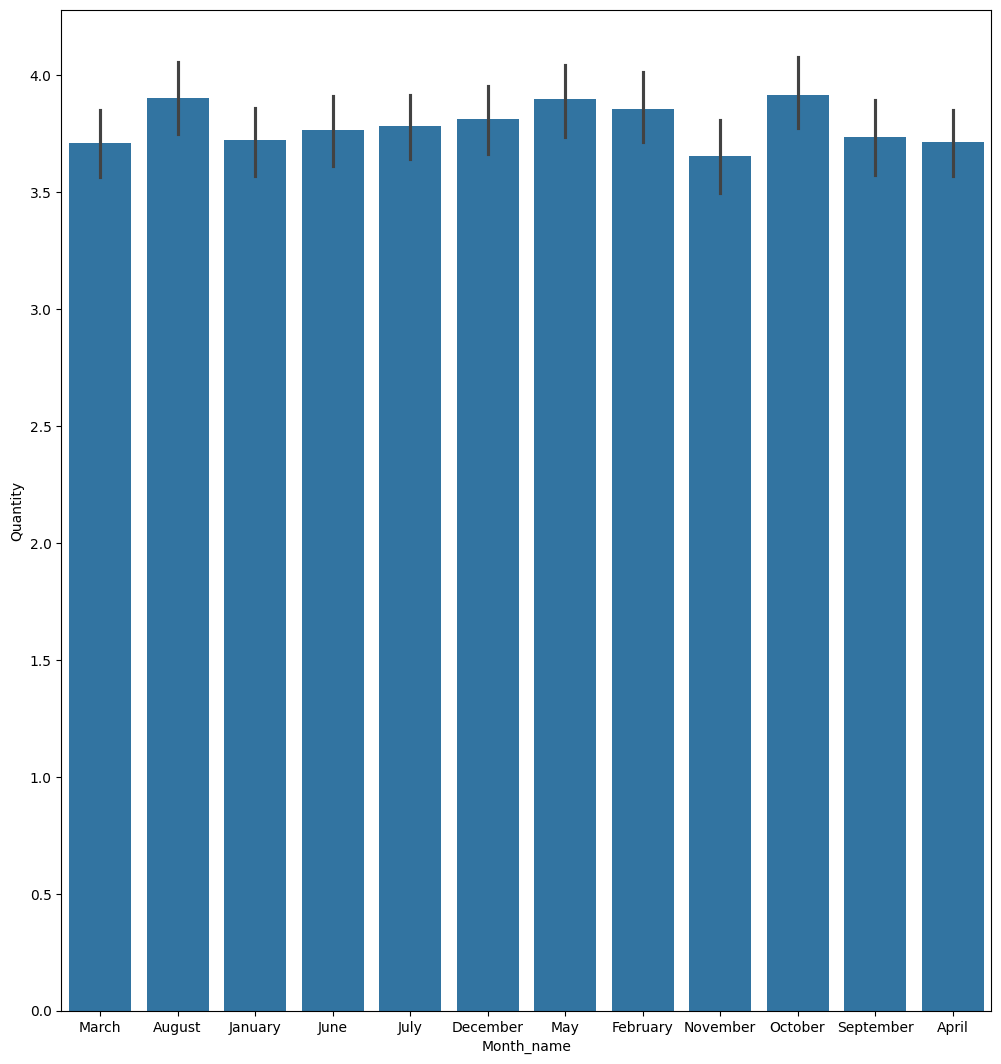

In [21]:
fig, ax = plt.subplots(figsize=(12, 13))

sns.barplot(data=df,x='Month_name',y='Quantity',ax=ax)


In [22]:
query = f"select distinct Region,sum(Quantity) as qty,year,Month_name from {table_name} where Month_name='October' group by Region order by qty DESC;"
result = pd.read_sql_query(query, conn)

# Display the results
result

,Region,qty,year,Month_name
0,West,1028,2022,October
1,East,997,2023,October
2,Central,813,2022,October
3,South,533,2022,October


# **1) discount analysis**

in october provide high discount especially in october west region(2022 - october) recorded highest discount - following central(2022),east(2023) and south(2022)

# **2) sales analysis**

in october provide high sales espesially in october west region(2022-october) recorded highest selling price following east(2023), central(2022) , south(2022)


*************************************************
# **3) quantity analysis**

october and august month provide highest quantity was moved

taken october month high quantity was recorded by west region(2022 - october),following east (2023), central(2022), south(2022)

# **4) profit analysis**

in october month provide highest profit espesially South Region (2022-october) recorded highest profit . following central(2022), west(2022) and east(2023)

***********************************************

**my suggection**:- when discount provides, selling price,quantity also increases

eg: - especially october 2022 provide high discounts given to west region
($2,827) discounts.  so -they- provide - high -selling - price ($74,172) , and high total quantity solded(1028 units) , but profit ($5662) was low comparitly south region

and

october 2022 provide least discounts give to south region ($1913) discount so they generates selling price ($50,456), least total quantity solded (533 units) only , but they provide high profit($6096)

*****************************************************************

#**conclusion**:-

south region covered by premium customers and west region covered by normal customer both regions are very important especially south region solded half of quantity sold compared by west region but profit of south region was high


# **4)Segment**

<Axes: xlabel='Segment', ylabel='Discount'>

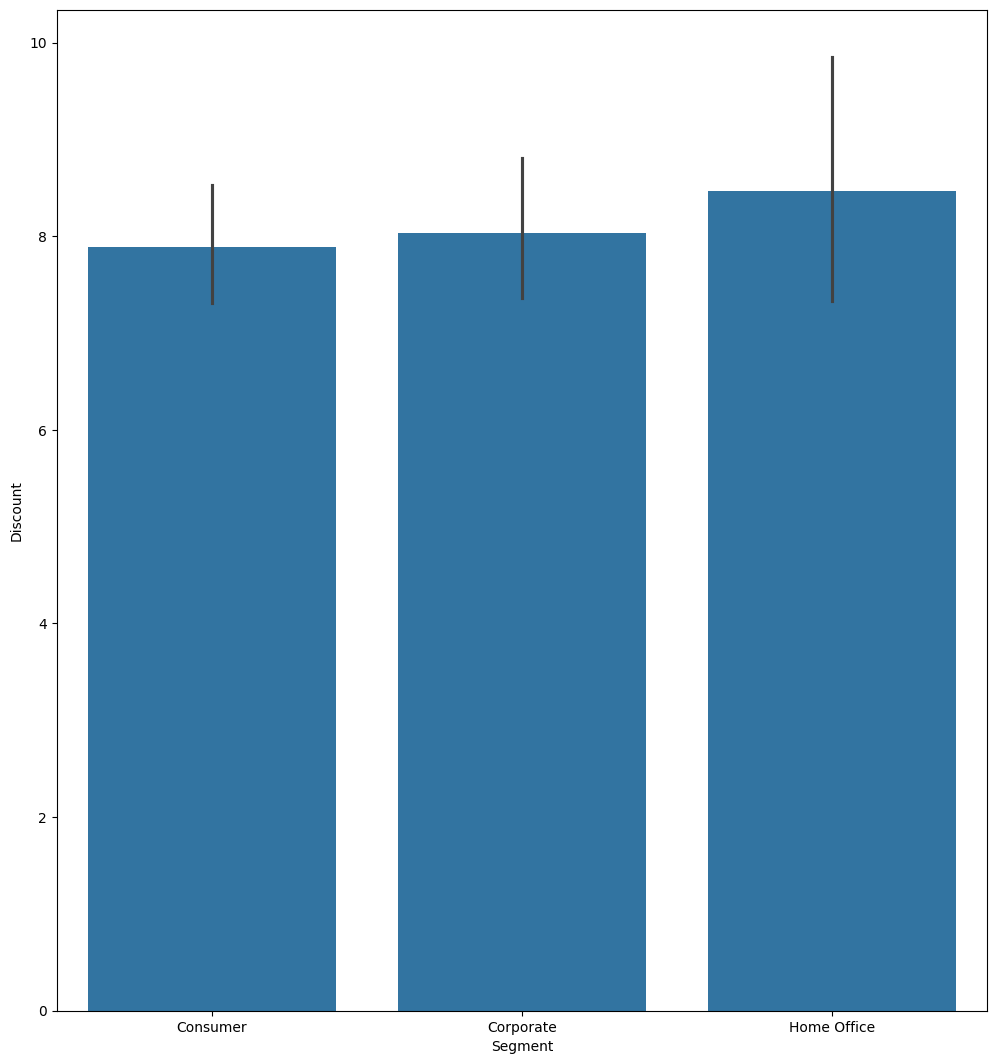

In [23]:
fig, ax = plt.subplots(figsize=(12, 13))

sns.barplot(data=df,x='Segment',y='Discount',ax=ax)


<Axes: xlabel='Segment', ylabel='Selling_Price'>

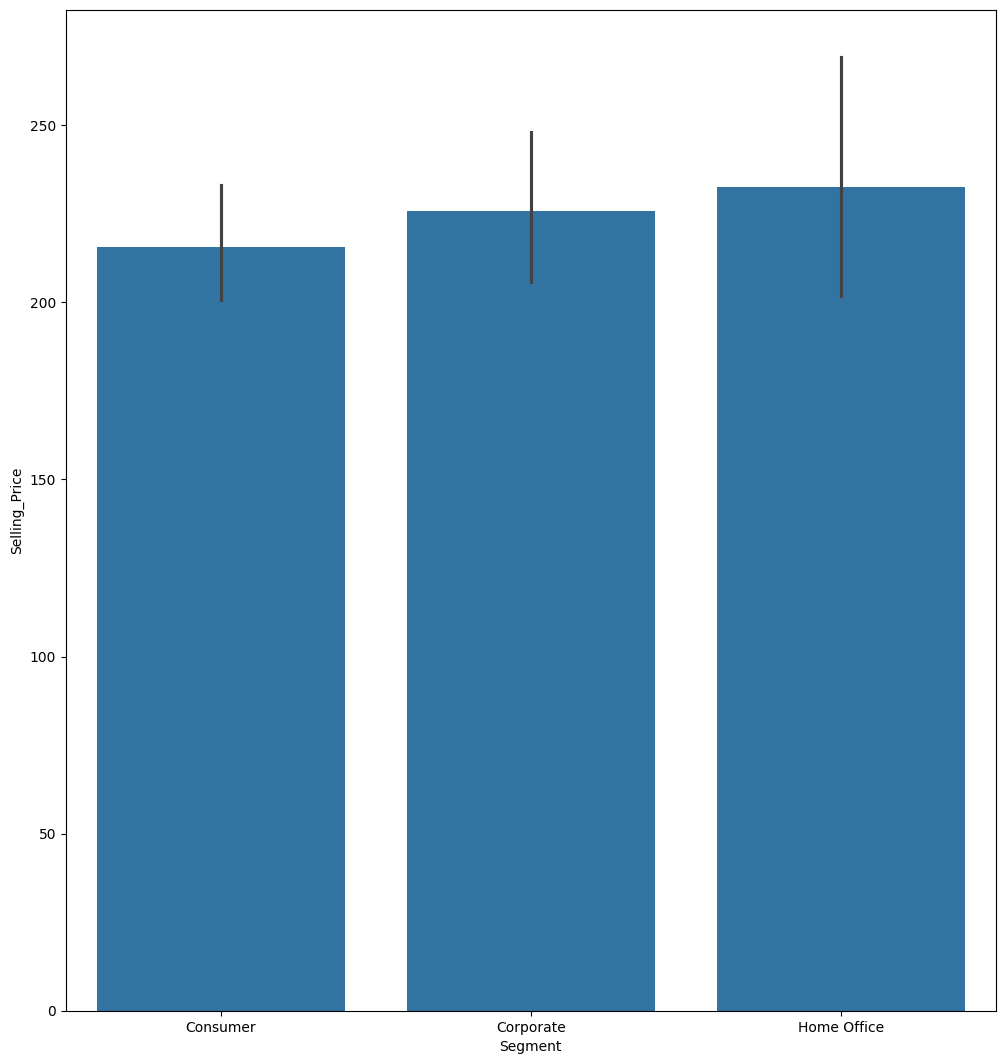

In [24]:
fig, ax = plt.subplots(figsize=(12, 13))

sns.barplot(data=df,x='Segment',y='Selling_Price',ax=ax)


<Axes: xlabel='Segment', ylabel='Quantity'>

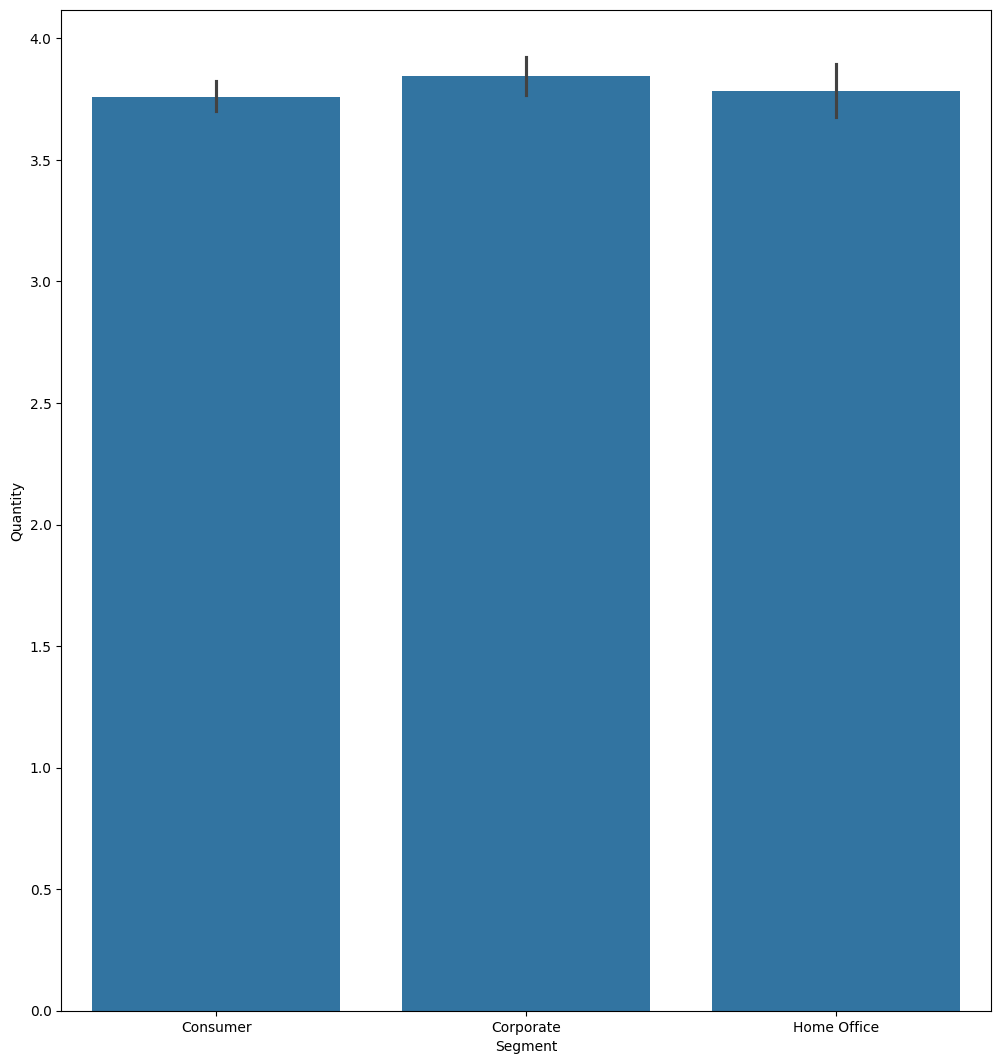

In [25]:
fig, ax = plt.subplots(figsize=(12, 13))

sns.barplot(data=df,x='Segment',y='Quantity',ax=ax)


<Axes: xlabel='Segment', ylabel='Profit'>

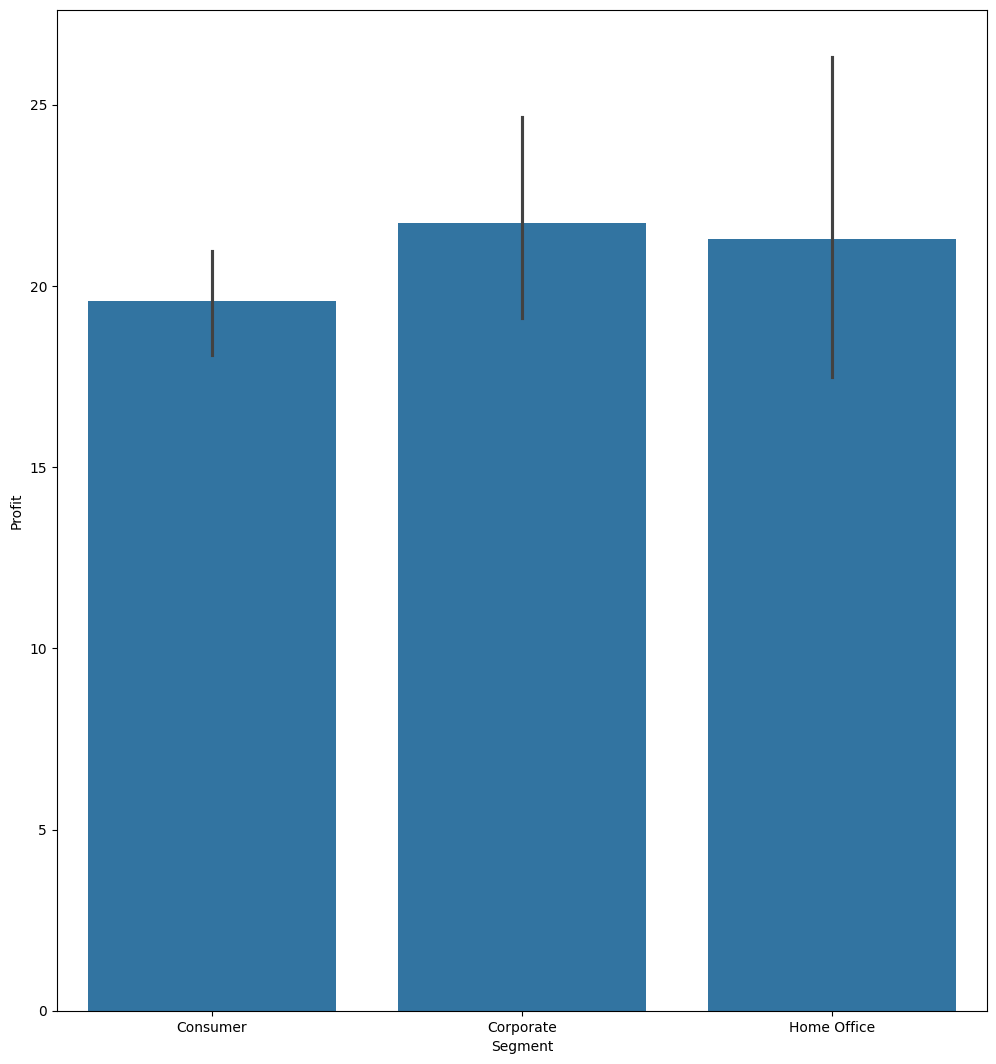

In [26]:
fig, ax = plt.subplots(figsize=(12, 13))

sns.barplot(data=df,x='Segment',y='Profit',ax=ax)


high discounts - Home Office Segments

high Selling Price - Home office segments

but

high Quantity was - Corporate Segments

high Profit was - Corporate Segments


<Axes: xlabel='Region', ylabel='Month_name'>

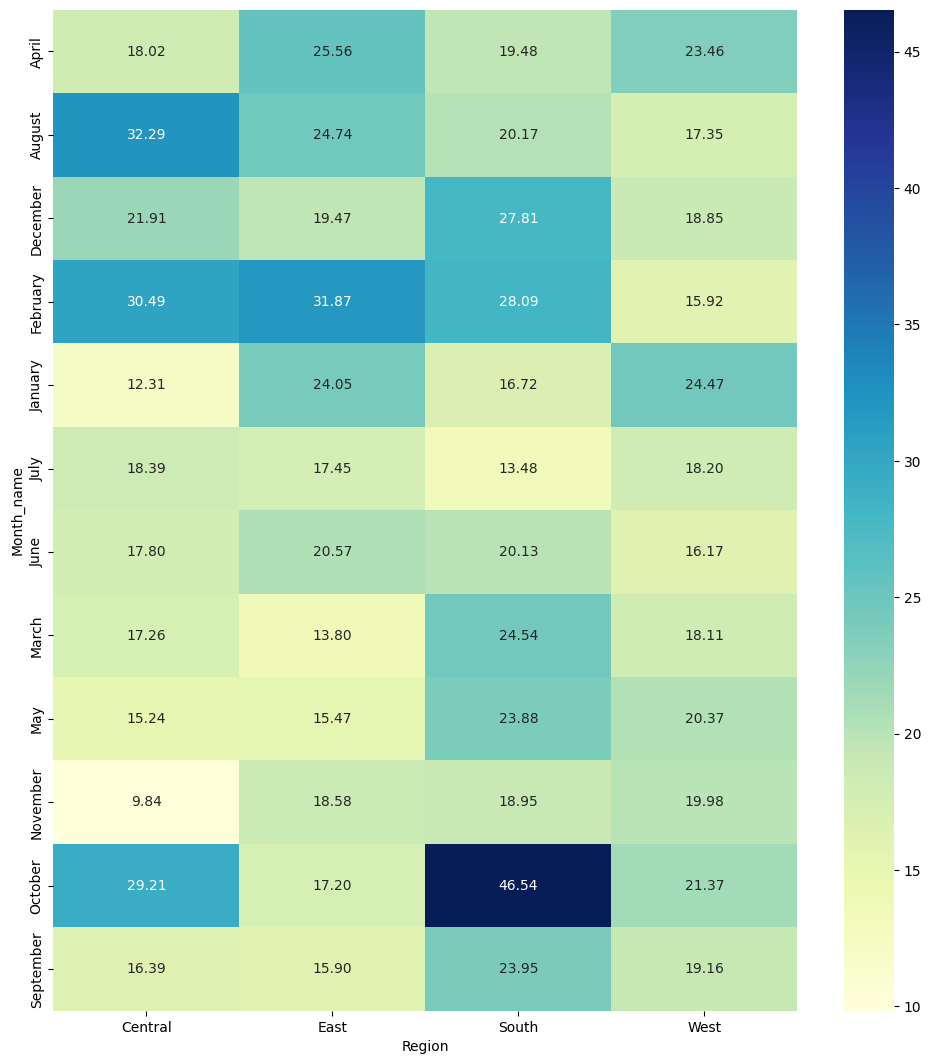

In [27]:
fig, ax = plt.subplots(figsize=(12, 13))

pivot_table1 = df.pivot_table(values='Profit', index='Month_name', columns='Region', aggfunc='mean')

# Create the heatmap
sns.heatmap(pivot_table1, annot=True, cmap='YlGnBu', fmt=".2f",ax=ax)

Calculations:

Maximum Profit Percentage: 46.54% (October - South)

Minimum Profit Percentage: 9.84% (November - Central)

Average Profit Percentage: 21.58%

Business Insights:

Regional Performance:

The South region consistently shows higher profit percentages compared to other regions. This suggests that the business might have a stronger market presence or more effective strategies in the South.
The Central region appears to have the lowest profit percentages overall. This warrants further investigation into potential challenges or opportunities in this region.

Seasonal Trends:

The highest profit percentages are observed in October, followed by December and September. This could be due to seasonal demand or marketing campaigns during these months.
In contrast, November and January seem to have lower profit percentages, indicating a potential dip in sales or increased costs during these periods.

Recommendations:

Focus on the South: The business should capitalize on the strong performance in the South by potentially expanding its market share or implementing similar strategies in other regions.
Investigate Central Region: Analyze the factors contributing to the lower profit percentages in the Central region. This could involve market research, competitor analysis, or operational reviews to identify areas for improvement.
Leverage Seasonality: Develop strategies to maximize profits during peak seasons (October, December, September) and mitigate potential losses during off-seasons (November, January). This could include targeted marketing campaigns, inventory adjustments, or cost-cutting measures.
Data-Driven Decision Making: Continuously monitor and analyze profit data to identify trends and patterns. This information can be used to refine strategies, allocate resources effectively, and make informed business decisions.

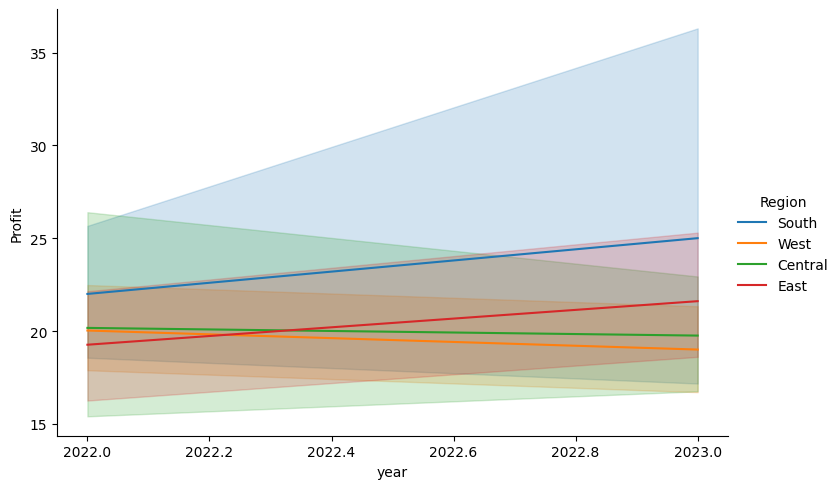

In [28]:
sns.relplot(data=df, x="year", y="Profit", hue="Region", kind="line", aspect=1.5)

# **this shart shows both posative and negative regression**

South & East region - slightly down to high (2022 to 2023);

West & Central region - high to down (2022 to 2023):


<ipython-input-29-2be48492bd29>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Profit'])


<Axes: xlabel='Profit', ylabel='Density'>

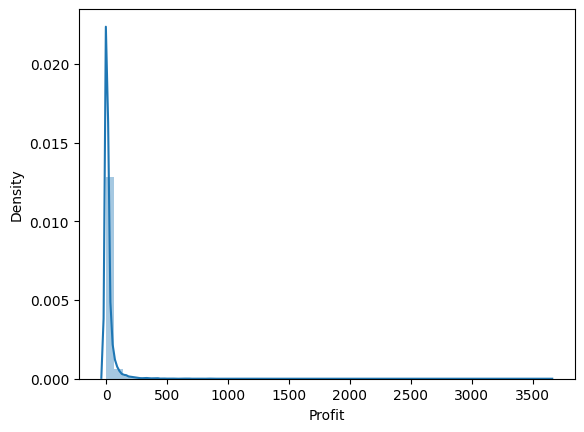

In [29]:
sns.distplot(df['Profit'])

peak on the left - **Right-skewed distributions** are also sometimes called positive-skewed distributions

<ipython-input-30-2be48492bd29>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Profit'])


<Axes: xlabel='Profit', ylabel='Density'>

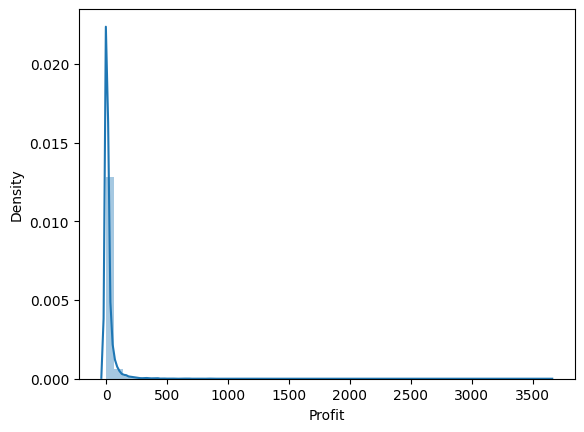

In [30]:
sns.distplot(df['Profit'])

<ipython-input-31-881ed5755e54>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Selling_Price'])


<Axes: xlabel='Selling_Price', ylabel='Density'>

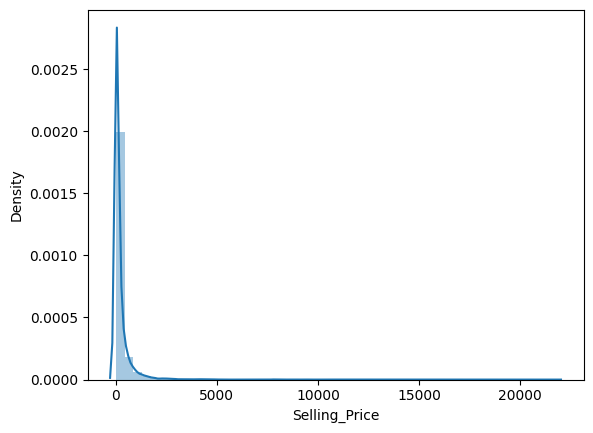

In [31]:
sns.distplot(df['Selling_Price'])

<ipython-input-32-88953e8c0432>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Discount'])


<Axes: xlabel='Discount', ylabel='Density'>

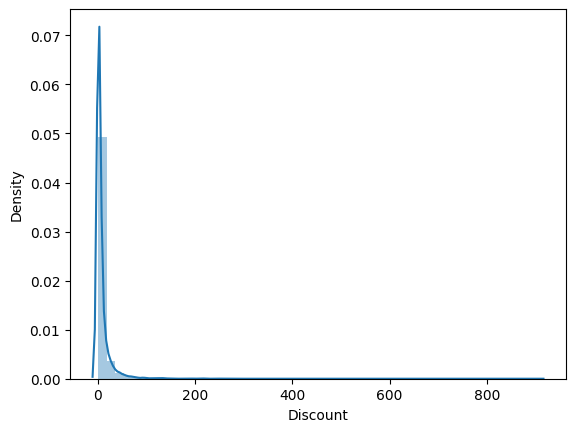

In [32]:
sns.distplot(df['Discount'])

look like the distplot chart - when selling_price, discount and profit better to give discount focus on south and west costomers because - south have premium customers its increase profit and west have high population normal customer so they also provide high profit

In [33]:
# sns.catplot(data=df,x='Region',y='Profit')

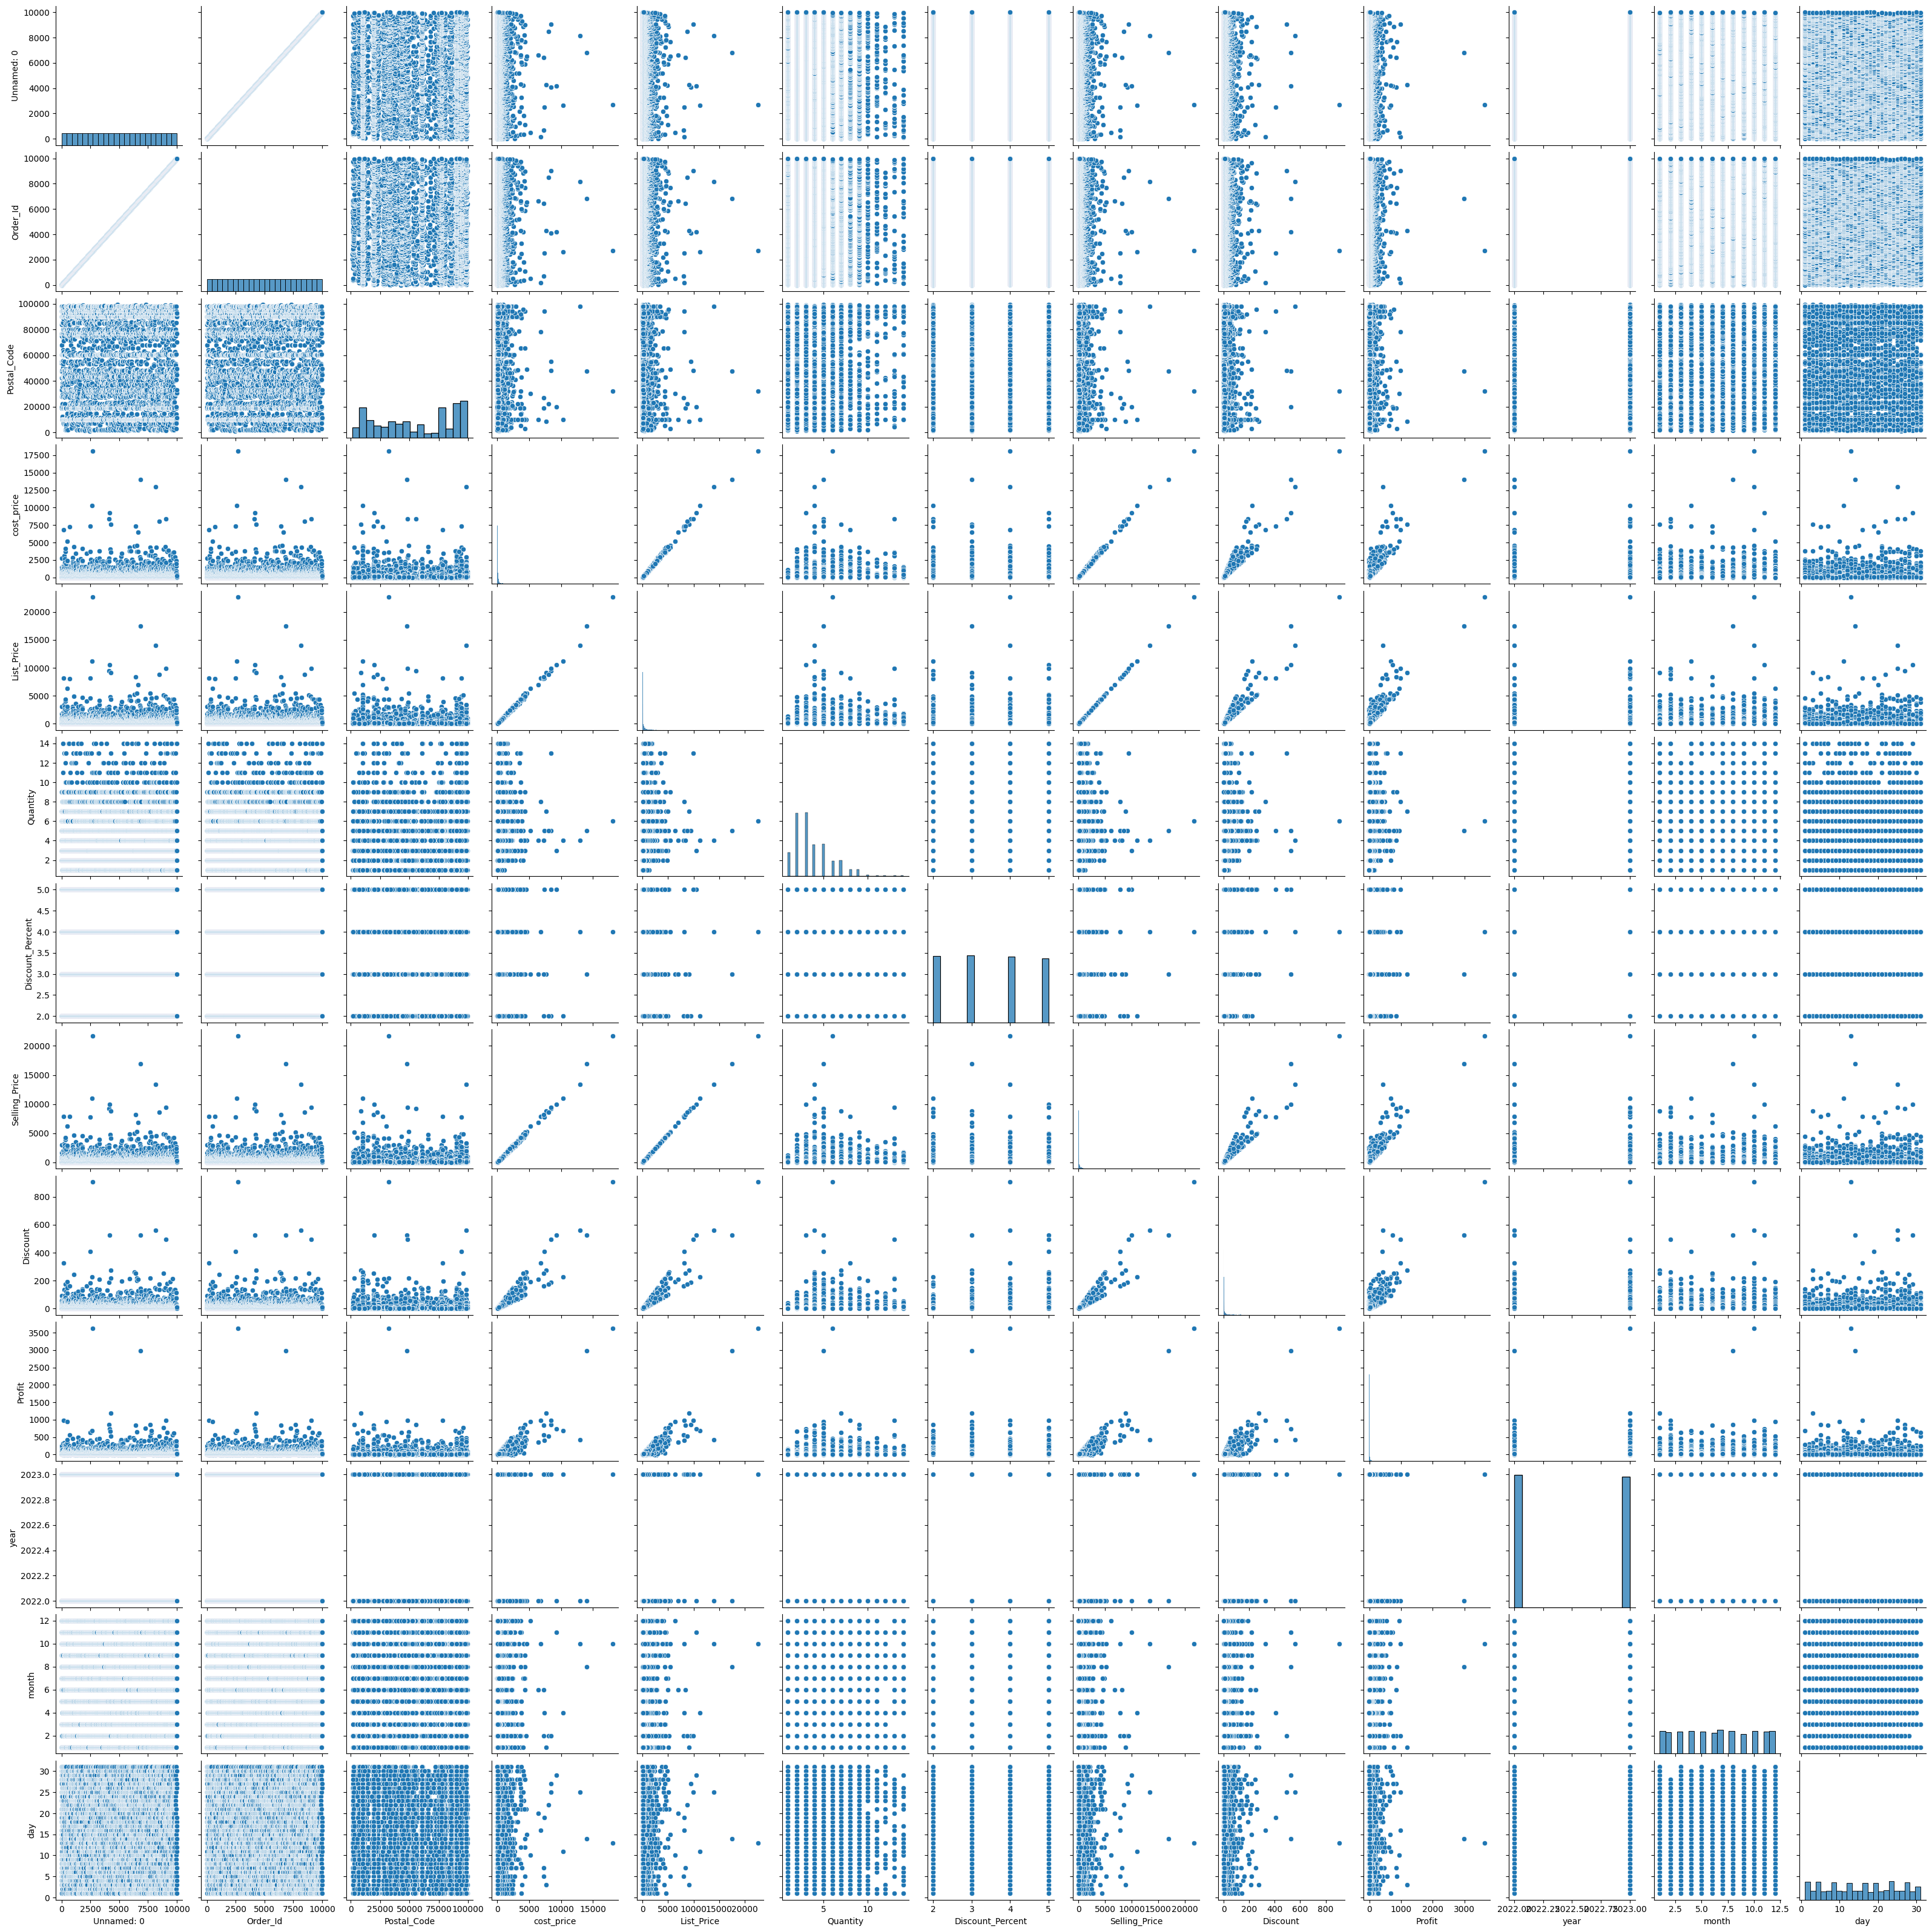

In [34]:
sns.pairplot(df)

Relationships:

Several plots show a positive correlation between variables. This suggests that an increase in one variable often leads to an increase in the other. For example, there seems to be a positive correlation between "Sales" and "Profit."
Some plots exhibit a negative correlation, indicating that an increase in one variable is associated with a decrease in the other. For example, there might be a negative correlation between "Marketing Spend" and "Profit."
Many plots show no clear linear relationship, suggesting that the variables are not strongly correlated.
Distributions:

The histograms on the diagonal provide information about the distribution of each variable. Some variables appear to be normally distributed, while others show skewness or other patterns.
Outliers: Some plots might reveal outliers, which are data points that deviate significantly from the general trend. These outliers could be due to errors or unusual events and should be investigated further.

<Axes: ylabel='Profit'>

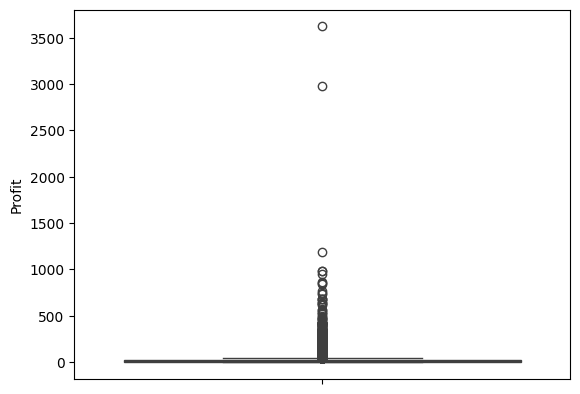

In [35]:
sns.boxplot(df['Profit'])

# **more outlayer**

<Axes: ylabel='Profit'>

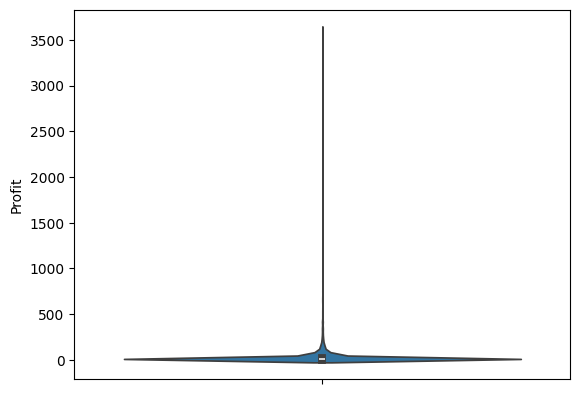

In [36]:
sns.violinplot(df['Profit'])

# **Average Profit was very Low**

#**my question to client or collecting data from outsourse or client:?**

1) they are selling product own e-commerse website or third party ecommerce websites

2) check customers reviews and rating on overall stores and seperate product ratings ?

3) if they sell product only on own e-commerse website means i will check that website SEO - Social Media engagements

4) analysing social media engagement and google analytics engament or any ad camping  and users there provide or minimum time spend for this website and maximum time spend on that website , analysing which region users mostly visit website. what age groups mostly visit websites and simentesly i analysied  what age group mostly purchase products its matching right means it will right track

5) which segment mostly focused consumers - corporte or home office or indiviguals - trageting on that age groups

6) analysing why sales drop? become of low discount ? or combitator provide high discount ? or consumers not aware about that website ? or there provide low quality product ( that will be analyize easily on customer rating )

7) i analusing that files there more product was decline ?  that means product quality not good ? or product delivery time was very high ? or product does not provide cod process ( cash on delivery )

8) it is Right-skewed distributions or positive skewed Regression
normal distribution only good



# **ABC INVENTORY based of RFM analysis**

In [42]:
# class_Sales write like that  class_qty, class_profit, class_discount